In [ ]:
#libraries
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import cluster


In [ ]:
data = sns.load_dataset("iris") 

In [ ]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris = data

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
#sns.pairplot(iris)

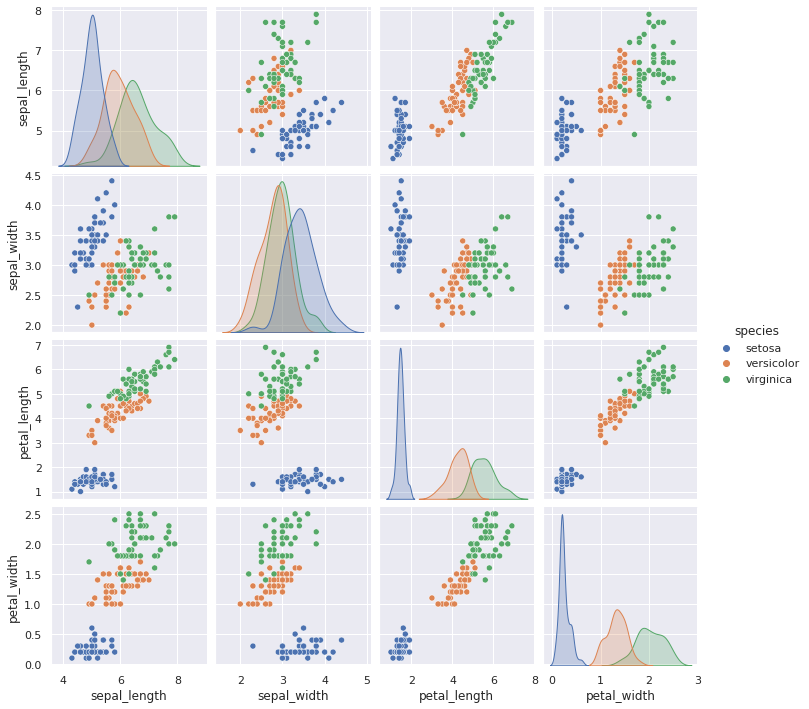

In [ ]:
sns.pairplot(iris, hue="species")

In [ ]:
feature_columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
X = iris[feature_columns].values
y = iris['species'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

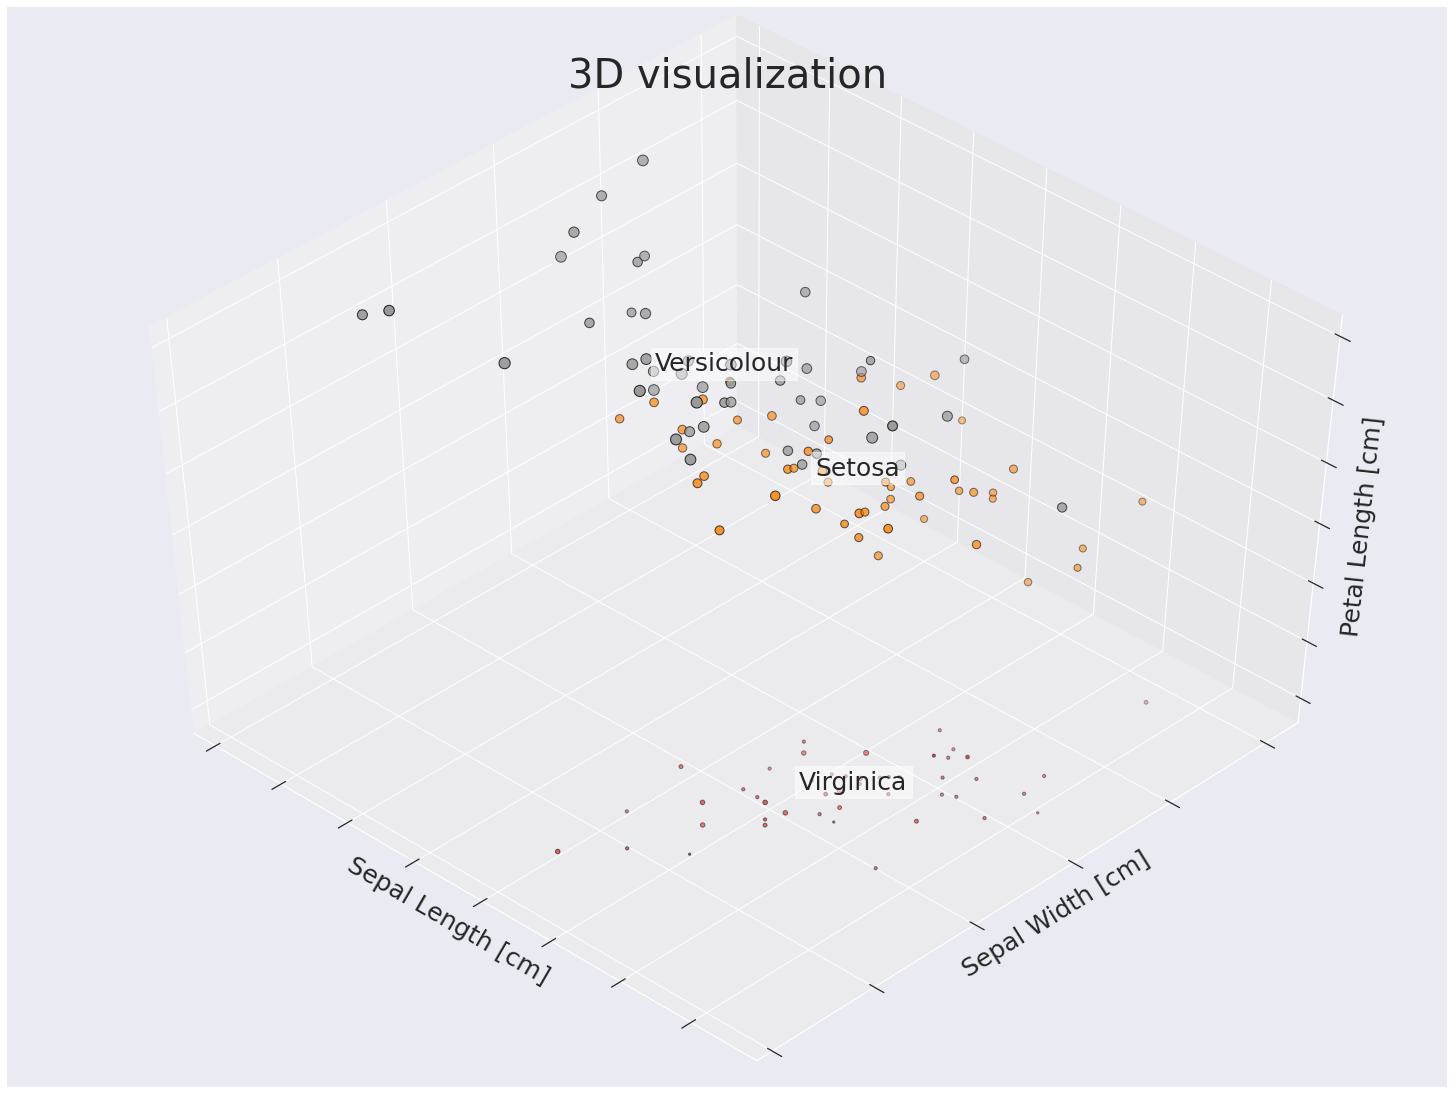

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=15)

In [ ]:
X_train=X
y_train=y

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = classifier.predict(X)

In [ ]:
cm = confusion_matrix(y,y_pred)
cm

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [ ]:
accuracy = accuracy_score(y, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [ ]:
k_list = list(range(2,20,1))
cv_scores = []

In [ ]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X, y)
  y_pred = classifier.predict(X)
  accuracy = accuracy_score(y, y_pred)*100
  print (k,accuracy)

2 98.0
3 96.0
4 96.0
5 96.66666666666667
6 97.33333333333334
7 97.33333333333334
8 98.0
9 98.0
10 98.0
11 97.33333333333334
12 98.0
13 98.0
14 98.0
15 98.66666666666667
16 98.66666666666667
17 98.0
18 97.33333333333334
19 98.0


<Figure size 432x288 with 0 Axes>

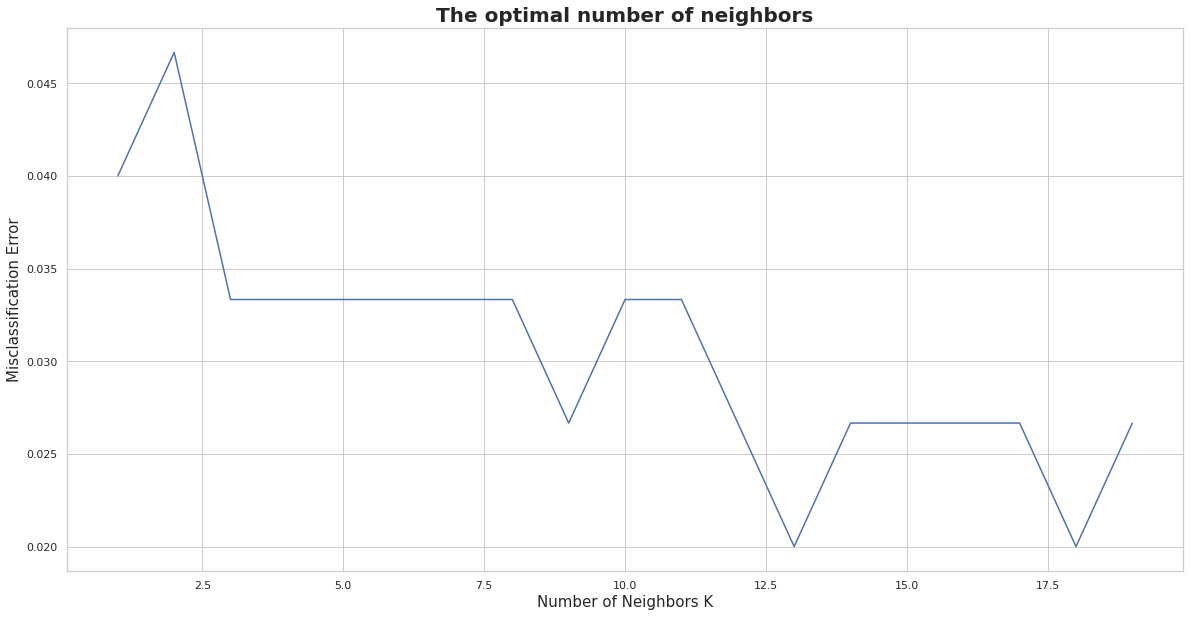

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(20,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()